In [1]:
from pathlib import Path

titanic_data_path = Path() / 'datasets' / 'titanic.csv'
assert titanic_data_path.is_file(), f'{titanic_data_path} not found'

In [20]:
import pandas as pd

titanic = pd.read_csv(titanic_data_path)


X = titanic[['Pclass', 'Age']] # 'SibSp', 'Parch', 'Fare'
X.insert(0, 'Constant', 1.0)
y = titanic['Survived']

In [22]:
from scratch.machine_learning import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.values.tolist(), y.tolist(), test_pct=0.25)

least squares fit: 100%|██████████| 1000/1000 [00:02<00:00, 434.42it/s]


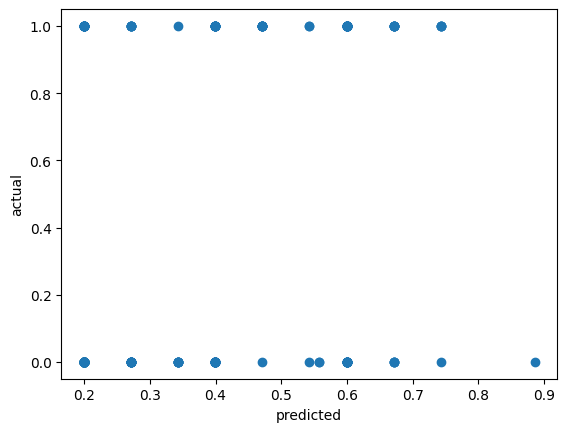

In [23]:
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict 
from scratch.gradient_descent import gradient_step

learning_rate = 0.001
rescaled_X = rescale(X_train)
beta = least_squares_fit(rescaled_X, y_train, learning_rate, 1000, 1)
predictions = [predict(x_i, beta) for x_i in rescale(X_test)]

plt.scatter(predictions, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()